In [2]:
from manim import *
import numpy as np

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.16.0.post0

## 1.- Presentación del problema

Computador capaz de jugar un juego contra un oponente.

¿Qué procedimiento puede realizar un computador para jugar de manera inteligente un juego con oponentes?

Juegos con oponentes: Damas, ajedrez, Go

Caso de ejemplo muy simple: Gato

GUIÓN:

En esta cápsula, abordaremos la pregunta sobre cómo un computador puede jugar de manera inteligente un juego contra un oponente. Nos enfocaremos en un tipo de juego en particular, a saber, juegos de suma cero, donde el beneficio que obtiene un jugador por una jugada en particular es en igual medida un costo para el adversario (de manera tal que los puntajes suman cero). Esto repercute en que se tratará con juegos donde el objetivo será ganar y evitar que el oponente gane.

In [3]:
%%manim -ql Intro

class Intro(Scene):
    def construct(self):
        content = """
         ¿Cómo logramos que un programa juegue estratégicamente contra un oponente?
        """
        tex = Tex(content, font_size=40)
        self.play(Create(tex), run_time=3)
        self.wait()

GUIÓN:

Para simplificar el argumento, comenzaremos analizando el gato, uno de los juegos de suma cero más simples que podemos encontrar. Se tiene el siguiente estado del juego, y supongamos que somos el jugador de círculos y es nuestro turno.Probablemente en esta situación nos parece obvio cual de las cuatro jugadas disponibles nos conviene más, pero consideremos el procedimiento que debería realizar un computador para optar por la jugada correcta.

Una primera aproximación intuitiva podría ser considerar reglas para cada situación del juego, de manera tal que en el tablero actual, dado que el jugador de cruces está a un movimiento de la victoria, lo lógico es bloquear dicha opción. Por lo tanto, uno de los protocolos de juego de nuestro programa podría ser algo como "Si el oponente tiene una opción de victoria, hay que bloquearla". Considerando las otras posibles situaciones del juego, podríamos instanciar más reglas que nos digan qué hacer en esos casos para construir nuestro agente.

El principal problema con la anterior solución, sin embargo, tiene que ver con la escala. El gato tiene 9 espacios, donde se pierde uno por turno, lo que nos dá un total de 9! = 362.880 posibles juegos. Si bien existen redundancias dentro de estos, aún así tendremos que programar una cantidad considerable de reglas para que nuestro agente juege de manera inteligente, y eso para uno de los juegos más simples. Si quisieramos luego programar algún agente que juegue ajedrez (donde tenemos 10^40 juegos posibles), considerar de manera explícita las reglas se vuelve infactible, de modo que nuestra solución, además de ser engorrosa, no escala a escenarios de mayor complejidad.

In [12]:
%%manim -ql Intuition

class Intuition(Scene):
    def construct(self):
        
        # Create adjacent table
        
        cross = VGroup(
            Line(UP + LEFT, DOWN + RIGHT),
            Line(UP + RIGHT, DOWN + LEFT)).set_color(RED).scale(0.5)
        
        circle = Circle().set_color(BLUE).scale(0.5)
        
        blank = Circle().set_color(BLACK).scale(0.5)
        
        a1 = blank.copy()
        a2 = cross.copy()
        a3 = blank.copy()
        
        b1 = cross.copy()
        b2 = circle.copy()
        b3 = circle.copy()
        
        c1 = cross.copy()
        c2 = blank.copy()
        c3 = blank.copy()
        
        table = MobjectTable(
            [[a1, a2, a3],
            [b1, b2, b3],
            [c1, c2, c3]])
        table.scale(0.5)
        self.play(Create(table), runtime=3)
        
        
        self.wait()
        
        # Cross victory
        
        self.play(Transform(
            c3, 
            circle.copy().set_color(BLUE).scale(0.5).move_to(table.get_cell(pos=(3, 3)))
        ))
        self.play(Transform(
            c3, 
            circle.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(3, 3)))
        ))
        self.play(Transform(
            c2, 
            circle.copy().set_color(BLUE).scale(0.5).move_to(table.get_cell(pos=(3, 2)))
        ))
        self.play(Transform(
            c2, 
            circle.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(3, 2)))
        ))
        self.play(Transform(
            a3, 
            circle.copy().set_color(BLUE).scale(0.5).move_to(table.get_cell(pos=(1, 3)))
        ))
#         self.play(Transform(
#             a3, 
#             circle.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(1, 3)))
#         ))
        
        self.play(Transform(
            a1, 
            cross.copy().set_color(RED).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ))
        
        self.play(a1.animate.set_color(GREEN), run_time=0.2)
        self.play(b1.animate.set_color(GREEN), run_time=0.2)
        self.play(c1.animate.set_color(GREEN), run_time=0.2)
        
        self.wait()
        
        self.play(a1.animate.set_color(RED), run_time=0.2)
        self.play(b1.animate.set_color(RED), run_time=0.2)
        self.play(c1.animate.set_color(RED), run_time=0.2)
        
        
        # Reset board
        
        self.play(Transform(
            a3, 
            circle.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(1, 3)))
        ), run_time=0.2)
        
        self.play(Transform(
            c3, 
            circle.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(3, 3)))
        ), run_time=0.2)
        self.play(Transform(
            a1, 
            cross.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ), run_time=0.2)
        
        self.wait()
        
        # Tie
        
        self.play(Transform(
            a1, 
            circle.copy().set_color(BLUE).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ))
        self.play(Transform(
            c3, 
            cross.copy().set_color(RED).scale(0.5).move_to(table.get_cell(pos=(3, 3)))
        ))
        self.play(Transform(
            c2, 
            circle.copy().set_color(BLUE).scale(0.5).move_to(table.get_cell(pos=(3, 2)))
        ))
        
        self.play(Transform(
            a3, 
            cross.copy().set_color(RED).scale(0.5).move_to(table.get_cell(pos=(1, 3)))
        ))
        
        self.wait()
        

In [64]:
# Tree templates

import networkx as nx


# Parameters

tree_layout_scale = 3
tree_buff = 1

# Define Tables
        
cross = VGroup(
    Line(UP + LEFT, DOWN + RIGHT),
    Line(UP + RIGHT, DOWN + LEFT)).set_color(RED).scale(0.5)

circle = Circle().set_color(BLUE).scale(0.5)

blank = Circle().set_color(BLACK).scale(0.5)

a1 = blank.copy()
a2 = cross.copy()
a3 = blank.copy()

b1 = cross.copy()
b2 = circle.copy()
b3 = circle.copy()

c1 = cross.copy()
c2 = blank.copy()
c3 = blank.copy()

base_table = MobjectTable(
    [[a1, a2, a3],
    [b1, b2, b3],
    [c1, c2, c3]]
).add_background_rectangle(color=BLACK)

first_loss_table = MobjectTable(
    [[cross.copy(), cross.copy(), blank.copy()],
    [cross.copy(), circle.copy(), circle.copy()],
    [cross.copy(), blank.copy(), circle.copy()]]
).add_background_rectangle(color=BLACK)

second_loss_table = MobjectTable(
    [[cross.copy(), cross.copy(), blank.copy()],
    [cross.copy(), circle.copy(), circle.copy()],
    [cross.copy(), circle.copy(), blank.copy()]]
).add_background_rectangle(color=BLACK)

third_loss_table = MobjectTable(
    [[cross.copy(), cross.copy(), circle.copy()],
    [cross.copy(), circle.copy(), circle.copy()],
    [cross.copy(), blank.copy(), blank.copy()]]
).add_background_rectangle(color=BLACK)

tie_table = MobjectTable(
    [[circle.copy(), cross.copy(), cross.copy()],
    [cross.copy(), circle.copy(), circle.copy()],
    [cross.copy(), circle.copy(), cross.copy()]]
).add_background_rectangle(color=BLACK)

# Define Trees

G = nx.Graph()
G.add_node(0)

nodes = [0, 1, 2, 3, 4,
         5, 6, 7, 8, 9, 10, 
         11, 12, 13, 14, 15]

edges = [(0, 1), (0, 2),(0, 3), (0, 4), 
         (1, 5), (1, 6), (2, 7),(2, 8),
         (3, 9), (3, 10), (4, 11), (4, 12), 
         (12, 13), (12, 14),
         (14, 15)]


for node in nodes:
    G.add_node(node)
for edge in edges:
    G.add_edge(edge[0], edge[1])

# Search trees

base_tree = Graph(list(G.nodes), 
          list(G.edges), 
          layout="tree", 
          root_vertex=0,
          labels=False,
          layout_scale=tree_layout_scale,
          vertex_mobjects={
              0: base_table.copy().scale(0.15)
          })

first_loss_tree = Graph(list(G.nodes),
             list(G.edges),
             layout="tree",
             root_vertex=0,
             labels=False,
             layout_scale=tree_layout_scale,
             vertex_config={
                 0: {"fill_color": RED},
                 1: {"fill_color": RED},
                 6: {"fill_color": RED}
             },
             edge_config={
                 (0,1): {"stroke_color": RED},
                 (1,6): {"stroke_color": RED}
             },
            vertex_mobjects={
                0: base_table.copy().scale(0.15),
                6: first_loss_table.copy().scale(0.15)
            })


second_loss_tree = Graph(list(G.nodes),
             list(G.edges),
             layout="tree",
             root_vertex=0,
             labels=False,
             layout_scale=tree_layout_scale,
             vertex_config={
                 0: {"fill_color": RED},
                 2: {"fill_color": RED},
                 8: {"fill_color": RED}
             },
             edge_config={
                 (0,2): {"stroke_color": RED},
                 (2,8): {"stroke_color": RED}
             },
            vertex_mobjects={
                0: base_table.copy().scale(0.15),
                8: second_loss_table.copy().scale(0.15)
            }
            )
third_loss_tree = Graph(list(G.nodes),
             list(G.edges),
             layout="tree",
             root_vertex=0,
             labels=False,
             layout_scale=tree_layout_scale,
             vertex_config={
                 0: {"fill_color": RED},
                 3: {"fill_color": RED},
                 10: {"fill_color": RED}
             },
             edge_config={
                 (0, 3): {"stroke_color": RED},
                 (3, 10): {"stroke_color": RED}
             },
            vertex_mobjects={
                0: base_table.copy().scale(0.15),
                10: third_loss_table.copy().scale(0.15)
            }
            )

tie_tree = Graph(list(G.nodes),
             list(G.edges),
             layout="tree",
             root_vertex=0,
             labels=False,
             layout_scale=tree_layout_scale,
             vertex_config={
                 0: {"fill_color": GREEN},
                 4: {"fill_color": GREEN},
                 12: {"fill_color": GREEN},
                 14: {"fill_color": GREEN},
                 15: {"fill_color": GREEN}

             },
             edge_config={
                 (0,4): {"stroke_color": GREEN},
                 (4,12): {"stroke_color": GREEN},
                 (12,14): {"stroke_color": GREEN},
                 (14,15): {"stroke_color": GREEN},
             },
            vertex_mobjects={
                0: base_table.copy().scale(0.15),
                15: tie_table.copy().scale(0.15)
            }
            )

# Utility trees

first_loss_utility_tree = Graph(list(G.nodes),
             list(G.edges),
             layout="tree",
             root_vertex=0,
             labels=False,
             layout_scale=tree_layout_scale,
             vertex_config={
                 0: {"fill_color": RED},
                 1: {"fill_color": RED},
                 6: {"fill_color": RED}
             },
             edge_config={
                 (0,1): {"stroke_color": RED},
                 (1,6): {"stroke_color": RED}
             },
            vertex_mobjects={
                0: base_table.copy().scale(0.15),
                6: LabeledDot(label=Text("-1", font_size=16), color=RED, radius=0.2)
            })

# First loss

first_loss_utility_parent_tree = Graph(list(G.nodes),
             list(G.edges),
             layout="tree",
             root_vertex=0,
             labels=False,
             layout_scale=tree_layout_scale,
             vertex_config={
                 0: {"fill_color": RED},
                 1: {"fill_color": RED},
                 6: {"fill_color": RED}
             },
             edge_config={
                 (0,1): {"stroke_color": RED},
                 (1,6): {"stroke_color": RED}
             },
            vertex_mobjects={
                0: base_table.copy().scale(0.15),
                1: LabeledDot(label=Text("-1", font_size=16), color=RED, radius=0.2),
                6: LabeledDot(label=Text("-1", font_size=16), color=RED, radius=0.2)
                
            })

# Tie

tie_utility_tree = Graph(list(G.nodes),
             list(G.edges),
             layout="tree",
             root_vertex=0,
             labels=False,
             layout_scale=tree_layout_scale,
             vertex_config={
                 0: {"fill_color": GREEN},
                 4: {"fill_color": GREEN},
                 12: {"fill_color": GREEN},
                 14: {"fill_color": GREEN},
                 15: {"fill_color": GREEN}

             },
             edge_config={
                 (0,4): {"stroke_color": GREEN},
                 (4,12): {"stroke_color": GREEN},
                 (12,14): {"stroke_color": GREEN},
                 (14,15): {"stroke_color": GREEN},
             },
            vertex_mobjects={
                0: base_table.copy().scale(0.15),
                15: LabeledDot(label=Text("0", font_size=16), color=GREEN, radius=0.2)
            })

tie_utility_parent_tree = Graph(list(G.nodes),
             list(G.edges),
             layout="tree",
             root_vertex=0,
             labels=False,
             layout_scale=tree_layout_scale,
             vertex_config={
                 0: {"fill_color": GREEN},
                 4: {"fill_color": GREEN},
                 12: {"fill_color": GREEN},
                 14: {"fill_color": GREEN},
                 15: {"fill_color": GREEN}

             },
             edge_config={
                 (0,4): {"stroke_color": GREEN},
                 (4,12): {"stroke_color": GREEN},
                 (12,14): {"stroke_color": GREEN},
                 (14,15): {"stroke_color": GREEN},
             },
            vertex_mobjects={
                0: base_table.copy().scale(0.15),
                4: LabeledDot(label=Text("0", font_size=16), color=GREEN, radius=0.2),
                12: LabeledDot(label=Text("0", font_size=16), color=GREEN, radius=0.2),
                14: LabeledDot(label=Text("0", font_size=16), color=GREEN, radius=0.2),
                15: LabeledDot(label=Text("0", font_size=16), color=GREEN, radius=0.2)
            })

In [3]:
%%manim -ql MatchAnalysis
import networkx as nx

class MatchAnalysis(Scene):
    def construct(self):
            # Parameters

        tree_layout_scale = 3
        tree_buff = 1

        # Define Tables

        cross = VGroup(
            Line(UP + LEFT, DOWN + RIGHT),
            Line(UP + RIGHT, DOWN + LEFT)).set_color(RED).scale(0.5)

        circle = Circle().set_color(BLUE).scale(0.5)

        blank = Circle().set_color(BLACK).scale(0.5)

        a1 = blank.copy()
        a2 = cross.copy()
        a3 = blank.copy()

        b1 = cross.copy()
        b2 = circle.copy()
        b3 = circle.copy()

        c1 = cross.copy()
        c2 = blank.copy()
        c3 = blank.copy()

        base_table = MobjectTable(
            [[a1, a2, a3],
            [b1, b2, b3],
            [c1, c2, c3]]
        ).add_background_rectangle(color=BLACK)

        first_loss_table = MobjectTable(
            [[cross.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), circle.copy()]]
        ).add_background_rectangle(color=BLACK)

        second_loss_table = MobjectTable(
            [[cross.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), circle.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK)

        third_loss_table = MobjectTable(
            [[cross.copy(), cross.copy(), circle.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK)

        tie_table = MobjectTable(
            [[circle.copy(), cross.copy(), cross.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), circle.copy(), cross.copy()]]
        ).add_background_rectangle(color=BLACK)

        # Define Trees

        G = nx.Graph()
        G.add_node(0)

        nodes = [0, 1, 2, 3, 4,
                 5, 6, 7, 8, 9, 10, 
                 11, 12, 13, 14, 15]

        edges = [(0, 1), (0, 2),(0, 3), (0, 4), 
                 (1, 5), (1, 6), (2, 7),(2, 8),
                 (3, 9), (3, 10), (4, 11), (4, 12), 
                 (12, 13), (12, 14),
                 (14, 15)]


        for node in nodes:
            G.add_node(node)
        for edge in edges:
            G.add_edge(edge[0], edge[1])

        # Search trees

        base_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                  vertex_mobjects={
                      0: base_table.copy().scale(0.15)
                  })

        first_loss_tree = Graph(list(G.nodes),
                     list(G.edges),
                     layout="tree",
                     root_vertex=0,
                     labels=False,
                     layout_scale=tree_layout_scale,
                     vertex_config={
                         0: {"fill_color": RED},
                         1: {"fill_color": RED},
                         6: {"fill_color": RED}
                     },
                     edge_config={
                         (0,1): {"stroke_color": RED},
                         (1,6): {"stroke_color": RED}
                     },
                    vertex_mobjects={
                        0: base_table.copy().scale(0.15),
                        6: first_loss_table.copy().scale(0.15)
                    })


        second_loss_tree = Graph(list(G.nodes),
                     list(G.edges),
                     layout="tree",
                     root_vertex=0,
                     labels=False,
                     layout_scale=tree_layout_scale,
                     vertex_config={
                         0: {"fill_color": RED},
                         2: {"fill_color": RED},
                         8: {"fill_color": RED}
                     },
                     edge_config={
                         (0,2): {"stroke_color": RED},
                         (2,8): {"stroke_color": RED}
                     },
                    vertex_mobjects={
                        0: base_table.copy().scale(0.15),
                        8: second_loss_table.copy().scale(0.15)
                    }
                    )
        third_loss_tree = Graph(list(G.nodes),
                     list(G.edges),
                     layout="tree",
                     root_vertex=0,
                     labels=False,
                     layout_scale=tree_layout_scale,
                     vertex_config={
                         0: {"fill_color": RED},
                         3: {"fill_color": RED},
                         10: {"fill_color": RED}
                     },
                     edge_config={
                         (0, 3): {"stroke_color": RED},
                         (3, 10): {"stroke_color": RED}
                     },
                    vertex_mobjects={
                        0: base_table.copy().scale(0.15),
                        10: third_loss_table.copy().scale(0.15)
                    }
                    )

        tie_tree = Graph(list(G.nodes),
                     list(G.edges),
                     layout="tree",
                     root_vertex=0,
                     labels=False,
                     layout_scale=tree_layout_scale,
                     vertex_config={
                         0: {"fill_color": GREEN},
                         4: {"fill_color": GREEN},
                         12: {"fill_color": GREEN},
                         14: {"fill_color": GREEN},
                         15: {"fill_color": GREEN}

                     },
                     edge_config={
                         (0,4): {"stroke_color": GREEN},
                         (4,12): {"stroke_color": GREEN},
                         (12,14): {"stroke_color": GREEN},
                         (14,15): {"stroke_color": GREEN},
                     },
                    vertex_mobjects={
                        0: base_table.copy().scale(0.15),
                        15: tie_table.copy().scale(0.15)
                    }
                    )

        # Create Table
        
        table = base_table.copy()
        table.scale(0.5)
        self.play(Create(table), runtime=3)
        self.play(table.animate.shift(RIGHT * 3))
        
        # Create Search Tree
        
        tree = base_tree.copy()
        tree.next_to(table, LEFT, buff=tree_buff)
        self.play(Create(
            tree
            ),
                 run_time=3)
        
        self.wait()
        
        # LOSSES
        
        # First transformation
        
        self.play(Transform(
            c3, 
            circle.copy().set_color(BLUE).scale(0.5).move_to(table.get_cell(pos=(3, 3)))
        ))
        
        self.play(Transform(
            a1, 
            cross.copy().set_color(RED).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ))
        
        self.play(Transform(
            tree,
            first_loss_tree.copy().next_to(table, LEFT, buff=tree_buff)
        ))
        
        
        # Reverse transformation
        
        self.play(Transform(
            c3, 
            circle.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(3, 3)))
        ))
        
        self.play(Transform(
            a1, 
            blank.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ))
        
        self.play(Transform(
            tree,
            base_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        # Second transformation
        
        self.play(Transform(
            c2, 
            circle.copy().set_color(BLUE).scale(0.5).move_to(table.get_cell(pos=(3, 2)))
        ))
        
        self.play(Transform(
            a1, 
            cross.copy().set_color(RED).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ))
        
        self.play(Transform(
            tree,
            second_loss_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        # Reverse transformation
        
        self.play(Transform(
            c2, 
            blank.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(3, 2)))
        ))
        
        self.play(Transform(
            a1, 
            blank.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ))
        
        self.play(Transform(
            tree,
            base_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        # Third transformation
        
        self.play(Transform(
            a3, 
            circle.copy().set_color(BLUE).scale(0.5).move_to(table.get_cell(pos=(1, 3)))
        ))
        
        self.play(Transform(
            a1, 
            cross.copy().set_color(RED).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ))
        
        self.play(Transform(
            tree,
            third_loss_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        # Reverse transformation
        
        self.play(Transform(
            a3, 
            blank.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(1, 3)))
        ))
        
        self.play(Transform(
            a1, 
            blank.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ))
        
        self.play(Transform(
            tree,
            base_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        # TIE
        
        self.play(Transform(
            a1, 
            circle.copy().set_color(BLUE).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ))
        self.play(Transform(
            c3, 
            cross.copy().set_color(RED).scale(0.5).move_to(table.get_cell(pos=(3, 3)))
        ))
        self.play(Transform(
            c2, 
            circle.copy().set_color(BLUE).scale(0.5).move_to(table.get_cell(pos=(3, 2)))
        ))
        
        self.play(Transform(
            a3, 
            cross.copy().set_color(RED).scale(0.5).move_to(table.get_cell(pos=(1, 3)))
        ))
        
        self.play(Transform(
            tree,
            tie_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        # Reverse transformation
        
        self.play(Transform(
            a1, 
            blank.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(1, 1)))
        ))
        self.play(Transform(
            c3, 
            blank.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(3, 3)))
        ))
        self.play(Transform(
            c2, 
            blank.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(3, 2)))
        ))
        
        self.play(Transform(
            a3, 
            blank.copy().set_color(BLACK).scale(0.5).move_to(table.get_cell(pos=(1, 3)))
        ))
        
        self.play(Transform(
            tree,
            base_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        
        
        self.wait()
        

GUIÓN: ¿Cómo determinamos los juegos posibles y el valor de sus resultados finales?

Una segunda aproximación que podemos considerar tiene relación con ser capaz de anticipar los resultados de un juego si realizo una jugada en particular, donde tal anticipación podría llevarse a cabo como sigue: 

Desde un estado en particular del juego, podemos ver el conjunto de los siguientes estados posibles en base a cada una de las jugadas que realicemos. Una vez que tengamos esos estados, queremos encontrar una manera de etiquetar estos estados en base a qué tan beneficiosos son para nosotros. Para hacer esas etiquetas, podemos hacer lo siguiente:

* Si el estado que estoy viendo es una victoria, lo etiqueto como "resultado bueno"
* Si el estado que estoy viendo es una derrota, lo etiqueto como "resultado malo"
* Si el estado que estoy viendo es un empate, lo etiqueto como "resultado mediocre"

Si el estado no entra en esas tres categorías, debemos hacer la anticipación del juego que mencionamos. Para esto, es necesario preguntarnos sobre qué jugada haría mi oponente en esta situación, y definir qué tipo de estado es en base a las acciones tomadas por mi oponente.

Como mi oponente está igual de interesado que yo en ganar, podemos asumir que para elegir una buena jugada, hará exactamente lo mismo que nosotros estamos haciendo actualmente, de modo que desde un estado en particular, buscaría los siguientes estados del tablero en base a las jugadas que puede realizar, y evaluaría cada uno de estos en base a si es una victoria, derrota o empate para sí mismo.

En caso de no haberla, se preguntaría, al igual que nosotros sobre que opción tomaría yo en esos estados. En tal caso volvemos a la situación inicial donde debemos decidir la jugada a realizar. Esta doble anticipación define un ciclo; volvemos a la misma situación de preguntarnos qué movimiento deberíamos realizar, pero con un tablero con menos espacios libres. Si llevamos a cabo este procedimiento las suficientes veces, podremos etiquetar todos los estados finales del juego como "buenos", "malos" o "mediocres". 

Luego, la decisión que tomamos debe ser aquella que nos lleve al mejor resultado posible dentro de los que tenemos disponibles en las jugadas siguientes.

In [82]:
%%manim -ql UtilityAnalysis
import networkx as nx



class UtilityAnalysis(Scene):
    def construct(self):
        
        # Parameters

        tree_layout_scale = 3
        tree_buff = 1

        # Define Tables

        cross = VGroup(
            Line(UP + LEFT, DOWN + RIGHT),
            Line(UP + RIGHT, DOWN + LEFT)).set_color(RED).scale(0.5)

        circle = Circle().set_color(BLUE).scale(0.5)

        blank = Circle().set_color(BLACK).scale(0.5)

        a1 = blank.copy()
        a2 = cross.copy()
        a3 = blank.copy()

        b1 = cross.copy()
        b2 = circle.copy()
        b3 = circle.copy()

        c1 = cross.copy()
        c2 = blank.copy()
        c3 = blank.copy()

        base_table = MobjectTable(
            [[a1, a2, a3],
            [b1, b2, b3],
            [c1, c2, c3]]
        ).add_background_rectangle(color=BLACK)

        first_loss_table = MobjectTable(
            [[cross.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), circle.copy()]]
        ).add_background_rectangle(color=BLACK)

        second_loss_table = MobjectTable(
            [[cross.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), circle.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK)

        third_loss_table = MobjectTable(
            [[cross.copy(), cross.copy(), circle.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK)

        tie_table = MobjectTable(
            [[circle.copy(), cross.copy(), cross.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), circle.copy(), cross.copy()]]
        ).add_background_rectangle(color=BLACK)

        # Define Trees

        G = nx.Graph()
        G.add_node(0)

        nodes = [0, 1, 2, 3, 4,
                 5, 6, 7, 8, 9, 10, 
                 11, 12, 13, 14, 15]

        edges = [(0, 1), (0, 2),(0, 3), (0, 4), 
                 (1, 5), (1, 6), (2, 7),(2, 8),
                 (3, 9), (3, 10), (4, 11), (4, 12), 
                 (12, 13), (12, 14),
                 (14, 15)]


        for node in nodes:
            G.add_node(node)
        for edge in edges:
            G.add_edge(edge[0], edge[1])
            
        # Base tree
        base_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                  vertex_mobjects={
                      0: base_table.copy().scale(0.15)
                  })
        
        # Utility trees

        first_loss_utility_tree = Graph(list(G.nodes),
                     list(G.edges),
                     layout="tree",
                     root_vertex=0,
                     labels=False,
                     layout_scale=tree_layout_scale,
                     vertex_config={
                         0: {"fill_color": RED},
                         1: {"fill_color": RED},
                         6: {"fill_color": RED}
                     },
                     edge_config={
                         (0,1): {"stroke_color": RED},
                         (1,6): {"stroke_color": RED}
                     },
                    vertex_mobjects={
                        0: base_table.copy().scale(0.15),
                        6: LabeledDot(label=Text("-1", font_size=16), color=RED, radius=0.2)
                    })

        # First loss

        first_loss_utility_parent_tree = Graph(list(G.nodes),
                     list(G.edges),
                     layout="tree",
                     root_vertex=0,
                     labels=False,
                     layout_scale=tree_layout_scale,
                     vertex_config={
                         0: {"fill_color": RED},
                         1: {"fill_color": RED},
                         6: {"fill_color": RED}
                     },
                     edge_config={
                         (0,1): {"stroke_color": RED},
                         (1,6): {"stroke_color": RED}
                     },
                    vertex_mobjects={
                        0: base_table.copy().scale(0.15),
                        1: LabeledDot(label=Text("-1", font_size=16), color=RED, radius=0.2),
                        6: LabeledDot(label=Text("-1", font_size=16), color=RED, radius=0.2)

                    })

        # Tie

        tie_utility_tree = Graph(list(G.nodes),
                     list(G.edges),
                     layout="tree",
                     root_vertex=0,
                     labels=False,
                     layout_scale=tree_layout_scale,
                     vertex_config={
                         0: {"fill_color": GREEN},
                         4: {"fill_color": GREEN},
                         12: {"fill_color": GREEN},
                         14: {"fill_color": GREEN},
                         15: {"fill_color": GREEN}

                     },
                     edge_config={
                         (0,4): {"stroke_color": GREEN},
                         (4,12): {"stroke_color": GREEN},
                         (12,14): {"stroke_color": GREEN},
                         (14,15): {"stroke_color": GREEN},
                     },
                    vertex_mobjects={
                        0: base_table.copy().scale(0.15),
                        15: LabeledDot(label=Text("0", font_size=16), color=GREEN, radius=0.2)
                    })

        tie_utility_parent_tree = Graph(list(G.nodes),
                     list(G.edges),
                     layout="tree",
                     root_vertex=0,
                     labels=False,
                     layout_scale=tree_layout_scale,
                     vertex_config={
                         0: {"fill_color": GREEN},
                         4: {"fill_color": GREEN},
                         12: {"fill_color": GREEN},
                         14: {"fill_color": GREEN},
                         15: {"fill_color": GREEN}

                     },
                     edge_config={
                         (0,4): {"stroke_color": GREEN},
                         (4,12): {"stroke_color": GREEN},
                         (12,14): {"stroke_color": GREEN},
                         (14,15): {"stroke_color": GREEN},
                     },
                    vertex_mobjects={
                        0: base_table.copy().scale(0.15),
                        4: LabeledDot(label=Text("0", font_size=16), color=GREEN, radius=0.2),
                        12: LabeledDot(label=Text("0", font_size=16), color=GREEN, radius=0.2),
                        14: LabeledDot(label=Text("0", font_size=16), color=GREEN, radius=0.2),
                        15: LabeledDot(label=Text("0", font_size=16), color=GREEN, radius=0.2)
                    })
        
        # Create Table
        
        table = base_table.copy()
        table.scale(0.5)
        table.shift(RIGHT * 3)
        self.add(table)
        
        
        # Create Search Tree
        
        tree = base_tree.copy()
        tree.next_to(table, LEFT, buff=tree_buff)
        self.add(tree)
        
        self.wait()
        
        # UTILITIES
        
        # Loss utility
        
        self.play(Transform(
            table,
            first_loss_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            tree,
            first_loss_utility_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        
        self.wait()
        
        self.play(Transform(
            tree,
            first_loss_utility_parent_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        self.wait()
        
        self.play(Transform(
            tree,
            base_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        self.wait()
        
        # Tie utility
        
        self.play(Transform(
            table,
            tie_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            tree,
            tie_utility_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        self.wait()
        
        self.play(Transform(
            tree,
            tie_utility_parent_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        self.wait()
        

In [1]:
%%manim Test

class Test(Scene):
    def construct(self):
        table = base_table.copy()
        self.add(first_table_utility_tree)



UsageError: Cell magic `%%manim` not found.


GUIÓN: ¿Cómo podemos saber el valor de un estado intermedio?

El escenario anterior nos ayuda a darle una etiqueta a los estados finales que podemos alcanzar en base a qué tan buenos son, pero aún no nos dice explícitamente qué movimiento debemos hacer desde un escenario en particular. En concreto, necesitamos poder decir qué tan bueno es un estado no final. 

La idea de anticipar el juego para decidir qué jugada hacer implica que el valor de la jugada que realizaremos se encuentra en los eventuales estados finales que podemos alcanzar a partir de esa decisión, de modo que tenemos que encontrar una manera de propagar el valor de los estados finales a los estados intermedios.

En este punto, agregaremos un nivel extra de abstracción, y diremos que las etiquetas de cada estado en realidad corresponden a puntajes asociados a los diferentes estados del juego. Así, a un resultado bueno le asignaremos un puntaje de 1, a un resultado malo le asignaremos un resultado de -1, y a un resultado mediocre le asignaremos un puntaje de 0.

Consideremos el estado anterior $s$ a un conjunto de estados finales, cada uno con su respectivo puntaje. Bajo la idea de que estamos anticipando el juego, es justo considerar que el valor que puede tener $s$ está condicionado al valor que tienen sus estados sucesores. Si en el estado $s$ es mí turno, el puntaje de $s$ será el máximo de los puntajes de los estados sucesores, pues en ese punto me interesa elegir la acción que me lleve al estado de mayor puntaje. Si, por el contrario, es turno de mi oponente, el puntaje de $s$ será el mínimo de los puntajes de los estados sucesores, pues un puntaje malo para mí es bueno para mi oponente. 

Ahora disponemos de etiquetas para estados intermedios que están justo antes que un estado sucesor, lo que nos permite aplicar el mismo principo que aplicamos para los nodos padre de los estados finales, y asignar puntaje a un nivel superior. Este método puede aplicarse sucesivamente hasta alcanzar el nivel siguiente a nuestro estado inicial, de manera tal que tenemos asignado un puntaje para todas las decisiones que podemos tomar. Luego, la jugada más conveniente será aquella que lleve al estado con mayor puntaje.

In [158]:
%%manim -ql HeuristicUtilityAnalysis
import networkx as nx


class HeuristicUtilityAnalysis(Scene):
    def construct(self):
        
        # Asumimos profundidad máxima de 1 nivel
        
        # Parameters

        tree_layout_scale = 3
        tree_buff = 1

        # Define Tables
        
        cross = VGroup(
            Line(UP + LEFT, DOWN + RIGHT),
            Line(UP + RIGHT, DOWN + LEFT)).set_color(RED).scale(0.5)

        circle = Circle().set_color(BLUE).scale(0.5)

        blank = Circle().set_color(BLACK).scale(0.5)

        a1 = blank.copy()
        a2 = cross.copy()
        a3 = blank.copy()

        b1 = cross.copy()
        b2 = circle.copy()
        b3 = circle.copy()

        c1 = cross.copy()
        c2 = blank.copy()
        c3 = blank.copy()
        
        # Search tables

        base_table = MobjectTable(
            [[a1, a2, a3],
            [b1, b2, b3],
            [c1, c2, c3]]
        ).add_background_rectangle(color=BLACK)

        first_table = MobjectTable(
            [[blank.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), circle.copy()]]
        ).add_background_rectangle(color=BLACK)


        fourth_table = MobjectTable(
            [[circle.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK)
        
        # Heuristic tables
        
        # Cross
        
        first_option_cross = MobjectTable(
            [[cross.copy().set_color(YELLOW), cross.copy().set_color(YELLOW), cross.copy().set_color(YELLOW)],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), circle.copy()]]
        ).add_background_rectangle(color=BLACK)
        
        second_option_cross = MobjectTable(
            [[cross.copy().set_color(YELLOW), cross.copy(), blank.copy()],
            [cross.copy().set_color(YELLOW), circle.copy(), circle.copy()],
            [cross.copy().set_color(YELLOW), blank.copy(), circle.copy()]]
        ).add_background_rectangle(color=BLACK)
        
        third_option_cross = MobjectTable(
            [[circle.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy().set_color(YELLOW), cross.copy().set_color(YELLOW), cross.copy().set_color(YELLOW)]]
        ).add_background_rectangle(color=BLACK)
        
        
        # Circle
        
        first_option_circle = MobjectTable(
            [[blank.copy(), cross.copy(), circle.copy().set_color(GREEN)],
            [cross.copy(), circle.copy(), circle.copy().set_color(GREEN)],
            [cross.copy(), blank.copy(), circle.copy().set_color(GREEN)]]
        ).add_background_rectangle(color=BLACK)
        
        second_option_circle = MobjectTable(
            [[circle.copy().set_color(GREEN), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy().set_color(GREEN), circle.copy()],
            [cross.copy(), blank.copy(), circle.copy().set_color(GREEN)]]
        ).add_background_rectangle(color=BLACK)
        
        third_option_circle = MobjectTable(
            [[circle.copy().set_color(GREEN), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy().set_color(GREEN), circle.copy()],
            [cross.copy(), blank.copy(), circle.copy().set_color(GREEN)]]
        ).add_background_rectangle(color=BLACK)
        
        fourth_option_circle = MobjectTable(
            [[circle.copy(), cross.copy(), circle.copy().set_color(GREEN)],
            [cross.copy(), circle.copy(), circle.copy().set_color(GREEN)],
            [cross.copy(), blank.copy(), circle.copy().set_color(GREEN)]]
        ).add_background_rectangle(color=BLACK)
        

        # Define Trees
        
        G = nx.Graph()
        G.add_node(0)

        nodes = [0, 1, 2, 3, 4]
        edges = [(0, 1), (0, 2), (0, 3), (0, 4)]


        for node in nodes:
            G.add_node(node)
        for edge in edges:
            G.add_edge(edge[0], edge[1])
            
        # Base tree
        
        base_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                  vertex_mobjects={
                      0: base_table.copy().scale(0.15)
                  })
        
        # Utility trees
        
        first_table_utility_tree = Graph(list(G.nodes),
                     list(G.edges),
                     layout="tree",
                     root_vertex=0,
                     labels=False,
                     layout_scale=tree_layout_scale,
                     vertex_config={
                         0: {"fill_color": RED},
                         1: {"fill_color": RED}
                     },
                     edge_config={
                         (0,1): {"stroke_color": RED}
                     },
                    vertex_mobjects={
                        0: base_table.copy().scale(0.15),
                        1: LabeledDot(label=Text("0", font_size=16), color=RED, radius=0.2)
                    })
        
        fourth_table_utility_tree = Graph(list(G.nodes),
                     list(G.edges),
                     layout="tree",
                     root_vertex=0,
                     labels=False,
                     layout_scale=tree_layout_scale,
                     vertex_config={
                         0: {"fill_color": GREEN},
                         4: {"fill_color": GREEN}
                     },
                     edge_config={
                         (0,4): {"stroke_color": GREEN}
                     },
                    vertex_mobjects={
                        0: base_table.copy().scale(0.15),
                        4: LabeledDot(label=Text("1", font_size=16), color=GREEN, radius=0.2)
                    })
        
        # Create Table
        
        table = base_table.copy()
        table.scale(0.5)
        table.shift(RIGHT * 3)
        self.add(table)
        
        
        # Create Search Tree
        
        tree = base_tree.copy()
        tree.next_to(table, LEFT, buff=tree_buff)
        self.add(tree)

        
        self.wait()
        # UTILITIES
        
        # First tree
        
        self.play(Transform(
            table,
            first_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        # Animate heuristic calculation
        
        # Circle options
        
        self.play(Transform(
            table,
            first_option_circle.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            table,
            first_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            table,
            second_option_circle.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            table,
            first_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        # Cross options
        
        self.play(Transform(
            table,
            first_option_cross.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            table,
            first_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            table,
            second_option_cross.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            table,
            first_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        # Utility tree
        
        self.play(Transform(
            tree,
            first_table_utility_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        self.wait()
        
        # Reverse
        
        self.play(Transform(
            tree,
            base_tree.copy().next_to(table, LEFT, buff=tree_buff)
        ))
        
        self.play(Transform(
            table,
            base_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.wait()
        
        # Fourth tree utility
        
        self.play(Transform(
            table,
            fourth_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        # Animate heuristic calculation
        
        # Circle options
        
        self.play(Transform(
            table,
            third_option_circle.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            table,
            fourth_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            table,
            fourth_option_circle.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            table,
            fourth_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        # Cross options
        
        self.play(Transform(
            table,
            third_option_cross.copy().scale(0.5).shift(table.get_center())
        ))
        
        self.play(Transform(
            table,
            fourth_table.copy().scale(0.5).shift(table.get_center())
        ))
        
        # Utility tree
        
        self.play(Transform(
            tree,
            fourth_table_utility_tree.next_to(table, LEFT, buff=tree_buff)
        ))
        
        self.wait()
        
        

GUIÓN: ¿Qué pasa si no podemos explorar el arbol completo?

El anterior procedimento nos permite, en principio, etiquetar todos los estados del juego en base a un puntaje, de manera tal que en un estado cualquiera, nuesto agente pueda tomar una decisión inteligente en base al puntaje del estado al que lleva dicha decisión. 

No obstante, tenemos nuevamente un problema de escala. La solución que definimos recién requiere que hagamos una exploración completa del arbol de estados del juego. Para un juego como el gato, con 9! estados, podemos efectivamente hacer eso sin problemas significativos de desempeño, pero si queremos hacer escalar nuestra solución, por ejemplo, al ajedrez, no sería posible, pues sería infactible hacer un árbol que explore los aprox 10^40 estados de dicho juego.

Ante esta situación, podemos hacer una transa y ceder precisión a cambio de explorar menos estados del juego. Esto es posible si limitamos a un máximo de jugadas a anticipar (que se traduce en la altura del árbol de búsqueda) y definimos un procedimiento que nos otorga una estimación sobre qué tan bueno es un estado en particular, pese a no ser un empate o victoria de alguno de los jugadores.

Por ejemplo, para el gato, podemos considerar la función:

utilidad = opciones abiertas mias - opciones abiertas del adversario

Aplicando dicha estimación, vemos que es posible tomar la misma decisión que se tomó al explorar el árbol hasta los estados terminales, pero recorriendo solamente un nivel de profundidad. No obstante, la calidad de la decisión de nuestro agente queda condicionada a la calidad de la estimació que elijamos.

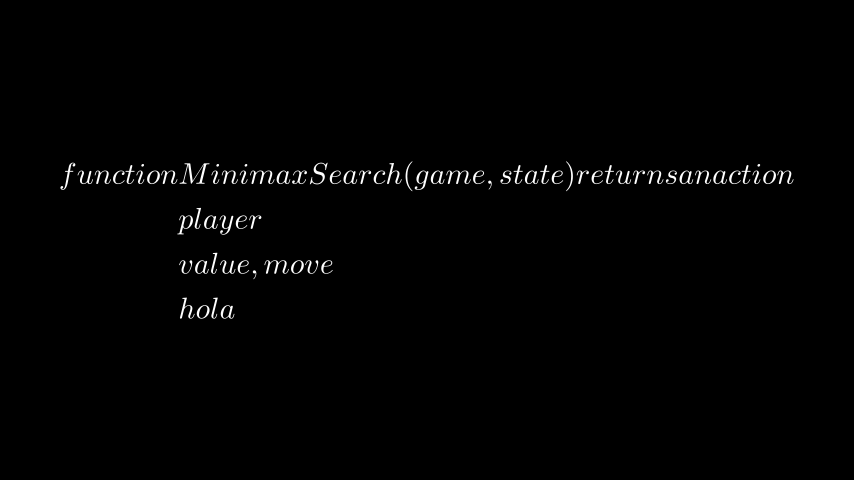

In [45]:
%%manim -ql PseudocodeMinimaxSearch


class PseudocodeMinimaxSearch(Scene):
    def construct(self):
        template = TexTemplate()
        template.add_to_preamble(r'\usepackage{algpseudocode}')
        template.add_to_preamble(r'\usepackage{algorithm}')
        tex = MathTex(
            r"function &MinimaxSearch(game, state) returns an action",
            r"\\&player",
            r"\\& value,move",
            r"\\&hola"
        )
        self.add(tex)
#         self.play(tex.animate().set_color_by_tex("player", RED))
        

GUIÓN: Construcción del pseudo-código

Llevemos la anterior solución a estructuras y procedimientos que puedan ser implementados por un computador. No obstante, antes que esto añadiremos un nivel adicional de abstracción; cuando antes hablaba de mi agente, ahora hablaré de un jugador hipotético llamado "Max". A su vez, cuando antes hablaba del oponente de mi agente, ahora me referiré a otro jugar llamado "Min". Los nombres tienen sentido en la medida en que transparentan los intereses de cada jugador. Las jugadas que le sirven a Max son aquellas con el puntaje más alto, mientras que las que le convienen a Min son las de puntaje más bajo.

Apliquemos ahora un nivel de abstracción al juego. Un juego cualquiera de las caracterísicas que nos interesan puede definirse en base al siguiente conjunto de operaciones:

* $s_0$: Estado inicial del juego.
* $to\_move(s)$: Función que recibe un estado del juego $s$ y retorna el jugador al que le toca mover.
* $actions(s)$: Función que recibe un estado del juego $s$ y retorna el conjunto de acciones legales que se pueden realizar desde ahí.
* $result(s,a)$: Función que recibe un estado del juego $s$ y una acción $a$ y retorna el estado resultante de realizar tal acción en ese estado. También se denomina modelo de transición.
* $is\_terminal(s)$: Función que recibe un estado $s$ y retorna $true$ si el estado es terminal (es decir, si algún jugador ganó u ocurrió un empate). De lo contrario, retorna $false$.
* $utility(s, p)$: Función que recibe un estado $s$ y un jugador $p$ y retorna el del estado para el jugador. Si el estado es terminal, denominaremos a este método "función de utilidad". Si es un estado intermedio, el método se denominará "función de evaluación".

Todas estas operaciones nos serán útiles a la hora de formalizar el procedimiento que fue descrito de manera intuitiva. Dicho algoritmo se denomina Minimax Search, y puede implementarse haciendo uso de las siguientes funciones:

* $max\_value(s)$: Función que recibe un estado $s$ y retorna el movimiento óptimo para Max si éste se encuentra en $s$, junto con el puntaje asociado a tal movimiento.

* $min\_value(s)$: Función que recibe un estado $s$ y retorna el movimiento óptimo para Min si éste se encuentra en $s$, junto con el puntaje asociado a tal movimiento.


La implementación de dichas funciones es de la siguiente manera:

$\textbf{function} \, max\_value(s):$

$\quad \textbf{if} \, is\_terminal(s) \, \textbf{then return} \, utility(s), nill$

$\quad v \leftarrow -\infty$

$\quad move \leftarrow nill$

$\quad \textbf{for each} \, a \, \textbf{in} \, actions(s) \, \textbf{do}$

$\qquad s^* \leftarrow result(s, a)$

$\qquad v_2, a_2 \leftarrow min\_value(s^*)$

$\qquad \textbf{if} \, v_2 > v \, \textbf{then}$

$\qquad \quad v \leftarrow v_2$

$\qquad \quad move \leftarrow a$

$\quad \textbf{return} \, v, move$


$\textbf{function} \, min\_value(s):$

$\quad \textbf{if} \, is\_terminal(s) \, \textbf{then return} \, utility(s), nill$

$\quad v \leftarrow +\infty$

$\quad move \leftarrow nill$

$\quad \textbf{for each} \, a \, \textbf{in} \, actions(s) \, \textbf{do}$

$\qquad s^* \leftarrow result(s, a)$

$\qquad v_2, a_2 \leftarrow max\_value(s^*)$

$\qquad \textbf{if} \, v_2 < v \, \textbf{then}$

$\qquad \quad v \leftarrow v_2$

$\qquad \quad move \leftarrow a$

$\quad \textbf{return} \, v, move$

La elección del movimiento óptimo para Max desde un estado $s$ **no terminal** viene dada por el resultado de la función $max\_value(s)$. Si recordamos el procedimiento, el primer paso para hacer una buena jugada consiste en obtener los estados asociados a cada una de las jugadas que Max tiene permitido hacer. Haciendo uso de las operaciones que definimos, esto puede lograrse si obtenemos el conjunto de acciones legales que puedo realizar mediante $actions(s)$, y si aplicamos a cada una de estas acciones el método $result(s,a)$, de manera tal que obtengo el conjunto de estados sucesores del estado inicial $s$.

Una vez que tengo el conjunto de estados sucesores de $s$, necesito determinar el puntaje asociado a cada uno de estos, y devolver la jugada asociada al estado de mayor puntaje, pues esa determinará el mejor camino posible para Max. Para estos efectos, tomamos un estado sucesor cualquiera $s^*$ y aplicamos la función $min\_value(s^*)$. Esta función tendrá dos casos:

* a) Si el estado $s^*$ es terminal, $min\_value(s^*)$ entregará el puntaje del estado según la función de utilidad.

* b) Si el estado $s^*$ no es terminal, recordemos que su utilidad venía determinada por el estado terminal que eventualmente podiamos alcanzar en caso de transitar hacia este estado. Para determinar cual es ese hipotético estado terminal, debemos anticipar la jugada que haría Min en esta posición. Hacer esto va a involucrar hacer lo mismo que Max hizo; Min obtendrá los estados sucesores y verificará el valor de cada jugada desde la perspectiva de su oponente. Para esto llamará a $max\_value$ y optará por la jugada que lleve al estado que más lo beneficie: la con el mínimo puntaje posible. 

Notamos que con la llamada a $max\_value$ volvemos al punto donde comenzamos, cerrando el ciclo que describimos al definir nuestro procedimiento intuitivo. Sin embargo, como llevamos a cabo dos movimientos en dicho ciclo, repetir el procedimiento llevará a que eventualmente alcancemos estados terminales, donde la función retornará las utilidades de tales estados, y se resolverán los llamados más abajo en el árbol.

Con respecto al problema de escala que mencionamos, podemos incorporar las siguientes adaptaciones al algoritmo y lograr el efecto deseado:

* Añadir un nivel de profundidad máximo $h$, que se actualice con cada llamada a las funciones
* Reemplazar la función $utility(s)$ por una función de evaluación $evaluate(s)$

Las anteriores modificaciones implican que se harán a lo más h llamadas a las funciones, y se pueden implementar en base al siguiente pseudocódigo:

$\textbf{function} \, max\_value(s, h):$

$\quad \textbf{if} \, is\_terminal(s) \, \textbf{or} \, h = 0\, \textbf{then return} \, evaluate(s), nill$

$\quad v \leftarrow -\infty$

$\quad move \leftarrow nill$

$\quad \textbf{for each} \, a \, \textbf{in} \, actions(s) \, \textbf{do}$

$\qquad s^* \leftarrow result(s, a)$

$\qquad v_2, a_2 \leftarrow min\_value(s^*, h-1)$

$\qquad \textbf{if} \, v_2 > v \, \textbf{then}$

$\qquad \quad v \leftarrow v_2$

$\qquad \quad move \leftarrow a$

$\quad \textbf{return} \, v, move$


$\textbf{function} \, min\_value(s, h):$

$\quad \textbf{if} \, is\_terminal(s) \, \textbf{then return} \, evaluate(s), nill$

$\quad v \leftarrow +\infty$

$\quad move \leftarrow nill$

$\quad \textbf{for each} \, a \, \textbf{in} \, actions(s) \, \textbf{do}$

$\qquad s^* \leftarrow result(s, a)$

$\qquad v_2, a_2 \leftarrow max\_value(s^*,h-1)$

$\qquad \textbf{if} \, v_2 < v \, \textbf{then}$

$\qquad \quad v \leftarrow v_2$

$\qquad \quad move \leftarrow a$

$\quad \textbf{return} \, v, move$